In [5]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
barrel_path = '/content/drive/MyDrive/tset/lions_mane_jellyfish/barrel_jellyfish/barrel_jellyfish'
lions_path = '/content/drive/MyDrive/tset/lions_mane_jellyfish/lions_mane_jellyfish/lions_mane_jellyfish'
import os
import cv2
import numpy as np

def load_and_augment_images(folder, label, max_images=500):
    images = []
    labels = []

    # Keep track of how many images have been loaded
    image_count = 0

    for filename in os.listdir(folder):
        if image_count >= max_images:
            break  # Stop loading more images once we have reached the max_images

        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            # Resize the image to 128x128 pixels
            img = cv2.resize(img, (128, 128))

            # Original image
            images.append(img)
            labels.append(label)
            image_count += 1

            # Rotate the image by 90, 180, and 270 degrees (if space allows)
            for angle in [90, 180, 270]:
                if image_count < max_images:
                    rotated_img = cv2.rotate(img,
                                             cv2.ROTATE_90_CLOCKWISE if angle == 90 else
                                             cv2.ROTATE_180 if angle == 180 else cv2.ROTATE_90_COUNTERCLOCKWISE)
                    images.append(rotated_img)
                    labels.append(label)
                    image_count += 1
                else:
                    break

            # Flip the image horizontally and vertically (if space allows)
            if image_count < max_images:
                flipped_img_horiz = cv2.flip(img, 1)  # Horizontal flip
                flipped_img_vert = cv2.flip(img, 0)   # Vertical flip
                images.append(flipped_img_horiz)
                labels.append(label)
                image_count += 1
                if image_count < max_images:
                    images.append(flipped_img_vert)
                    labels.append(label)
                    image_count += 1

    return images, labels

# Load and augment barrel and lions images with a max of 500 images each
barrel_images, barrel_labels = load_and_augment_images(barrel_path, 0, 500) # Images of normal, label = 0
lions_images, lions_labels = load_and_augment_images(lions_path, 1, 500) # Images of abnormal, label = 1

# Combine and convert lists to arrays
all_images = np.array(barrel_images + lions_images)
all_labels = np.array(barrel_labels + lions_labels)

# Verify the number of images
print("Number of images in barrel_images:", len(barrel_images))
print("Number of images in lions_images:", len(lions_images))

Number of images in barrel_images: 500
Number of images in lions_images: 500


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
from google.colab import files

# Function to zip images for download
def zip_images(images, save_path, zip_name):
    zip_path = save_path + '.zip'
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for i, img in enumerate(images):
            img_filename = os.path.join(save_path, f"image_{i+1}.jpg")
            cv2.imwrite(img_filename, img)  # Save the image temporarily
            zipf.write(img_filename, os.path.basename(img_filename))  # Add image to zip file
            os.remove(img_filename)  # Remove the temporary image file
    return zip_path

# Paths to save the images for zipping
barrel_save_path = '/content/barrel_images_temp'
lions_save_path = '/content/lions_images_temp'

# Create directories to save images temporarily
os.makedirs(barrel_save_path, exist_ok=True)
os.makedirs(lions_save_path, exist_ok=True)

# Zip and download the barrel images
barrel_zip = zip_images(barrel_images, barrel_save_path, 'barrel_images')
lions_zip = zip_images(lions_images, lions_save_path, 'lions_images')

# Provide download links for Google Colab users
files.download(barrel_zip)  # Download the barrel images zip
files.download(lions_zip)   # Download the lions images zip

print("Images saved and zipped. Download links provided.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Images saved and zipped. Download links provided.


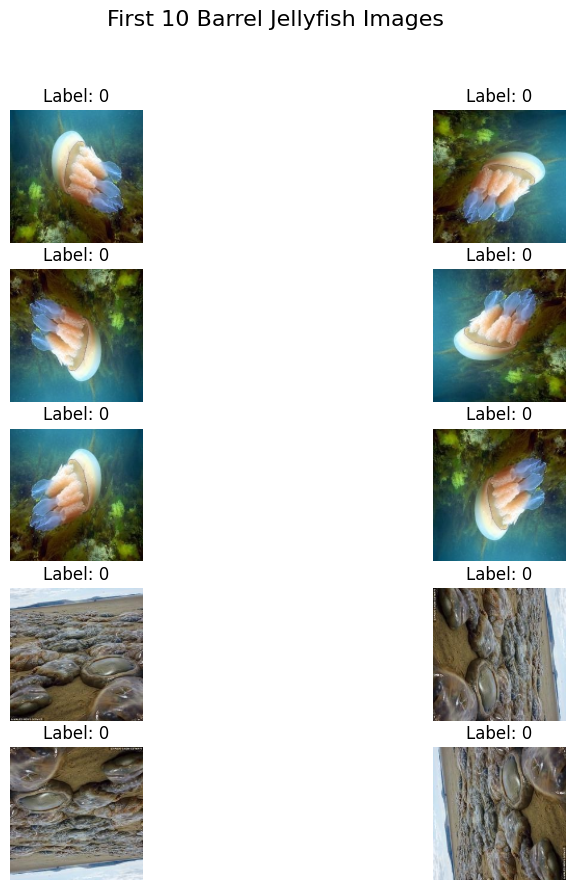

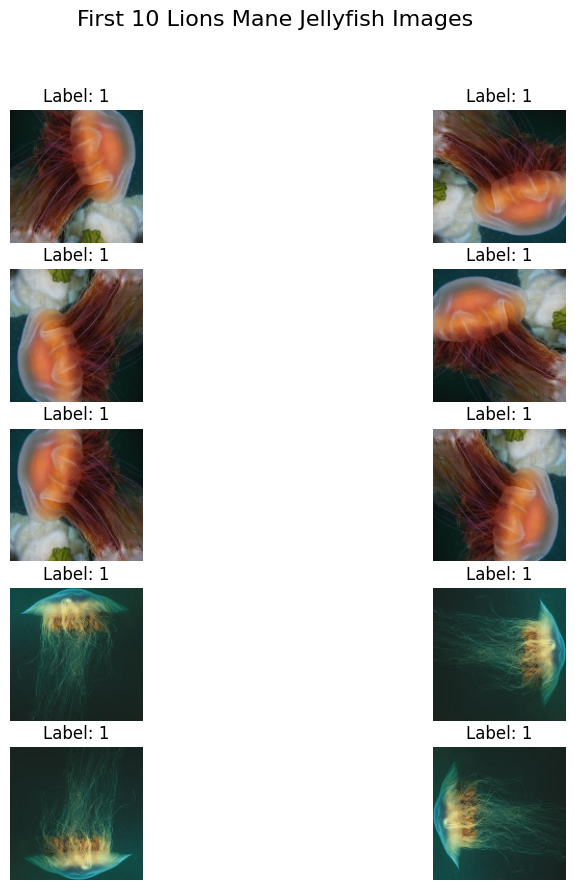

In [6]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, labels, title):
    plt.figure(figsize=(10, 10))  # Adjust the size of the figure
    for i in range(10):
        plt.subplot(5, 2, i + 1)  # 5 rows, 2 columns
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')  # Hide axes
    plt.suptitle(title, fontsize=16)
    plt.show()

# Show the first 10 images from barrel_images and lions_images
show_images(barrel_images, barrel_labels, "First 10 Barrel Jellyfish Images")
show_images(lions_images, lions_labels, "First 10 Lions Mane Jellyfish Images")
